In [10]:
import matplotlib.pyplot as plt
from pandas import read_csv
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_

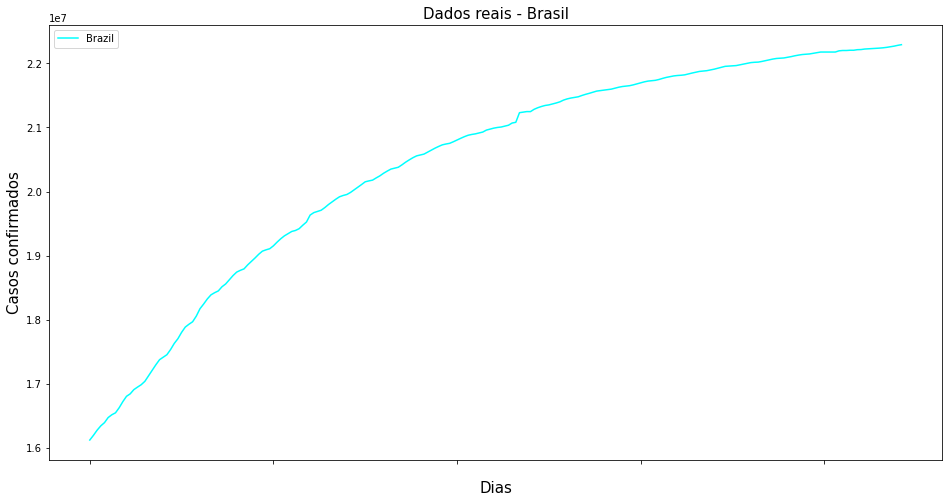

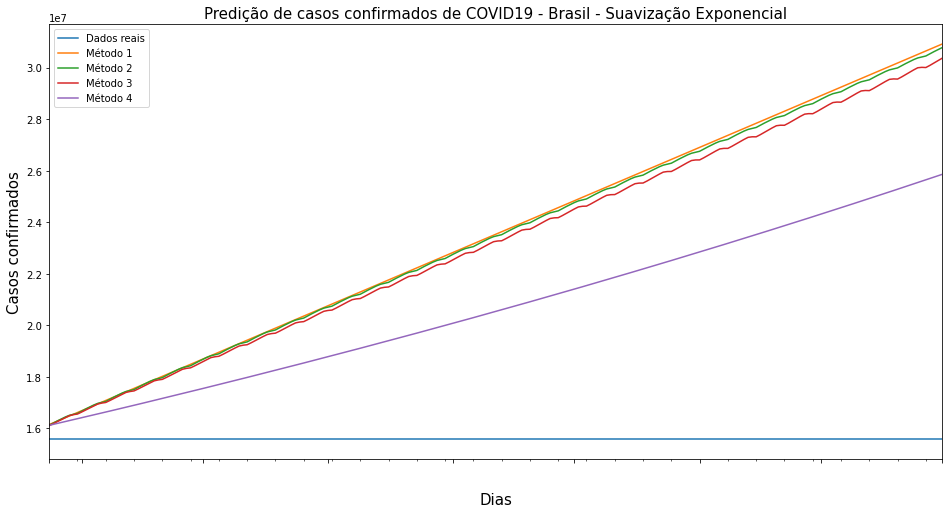

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_

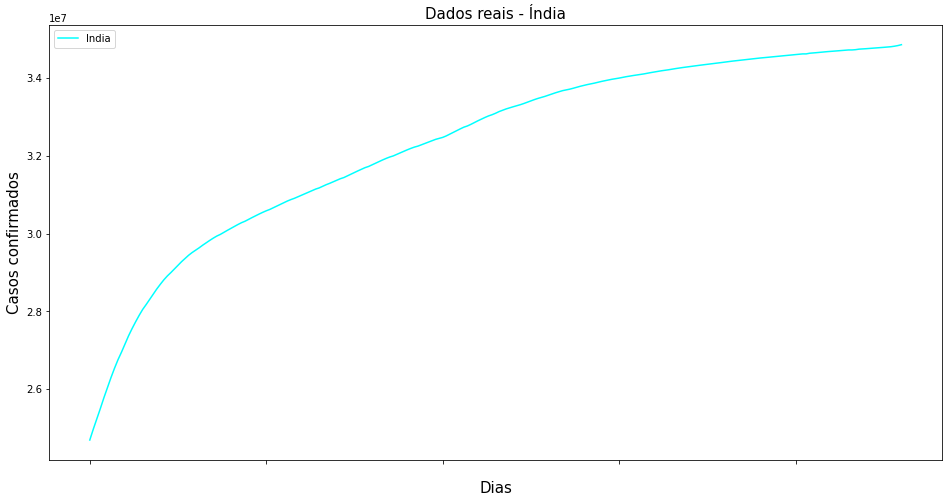

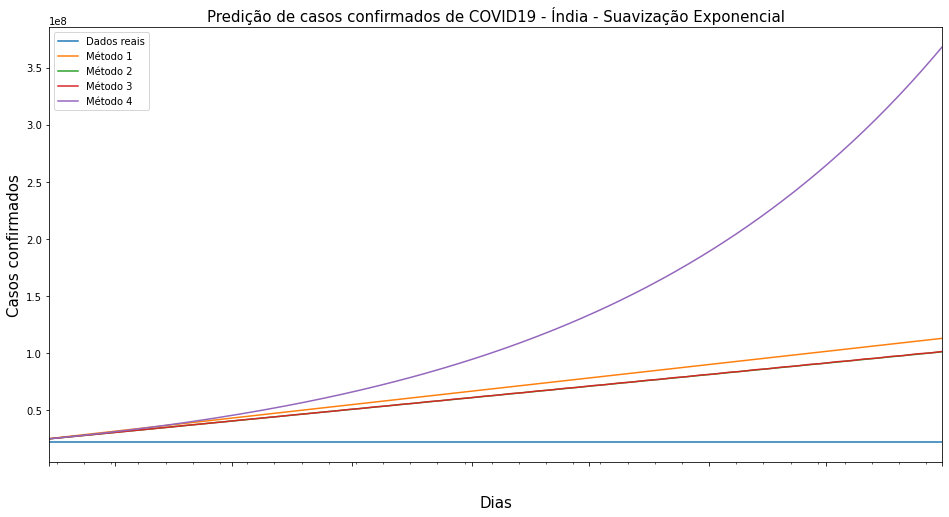

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_

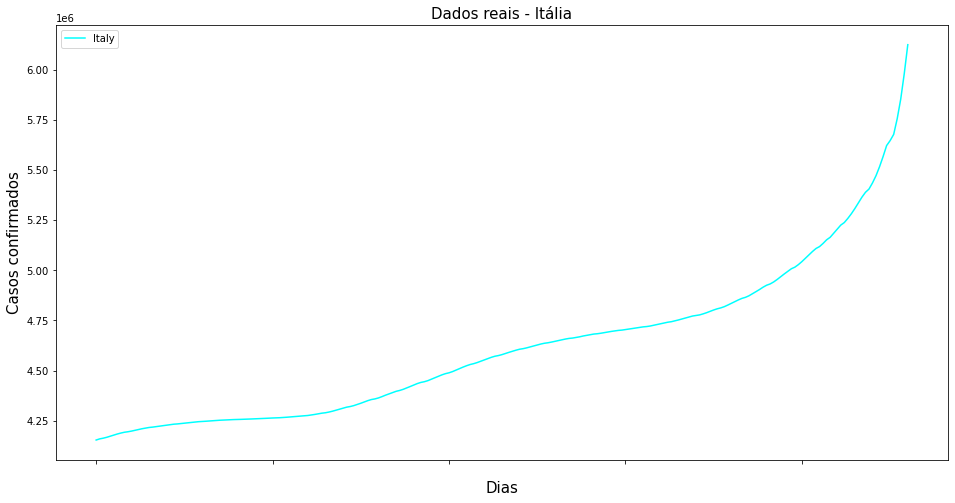

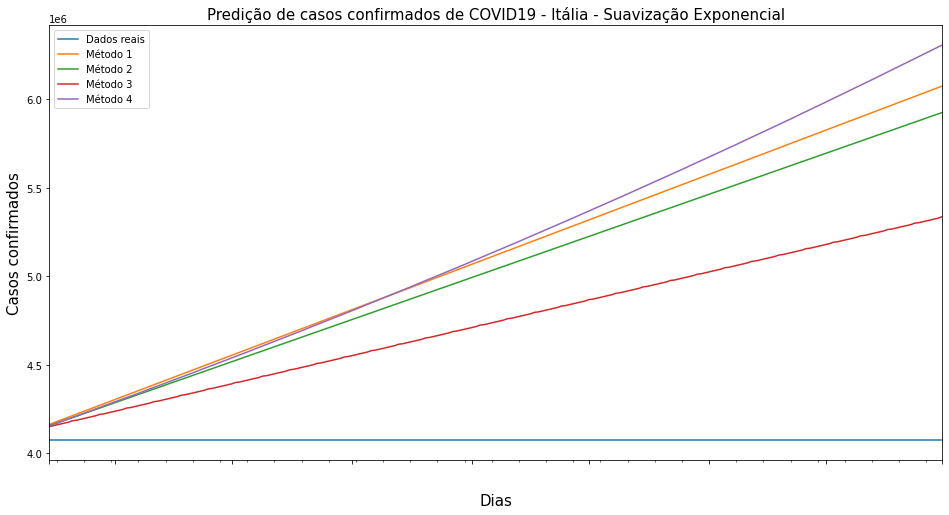

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_

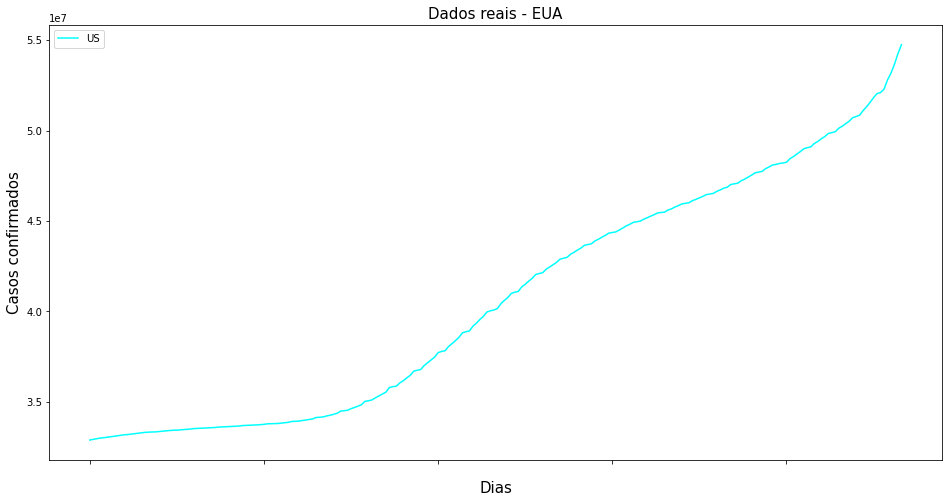

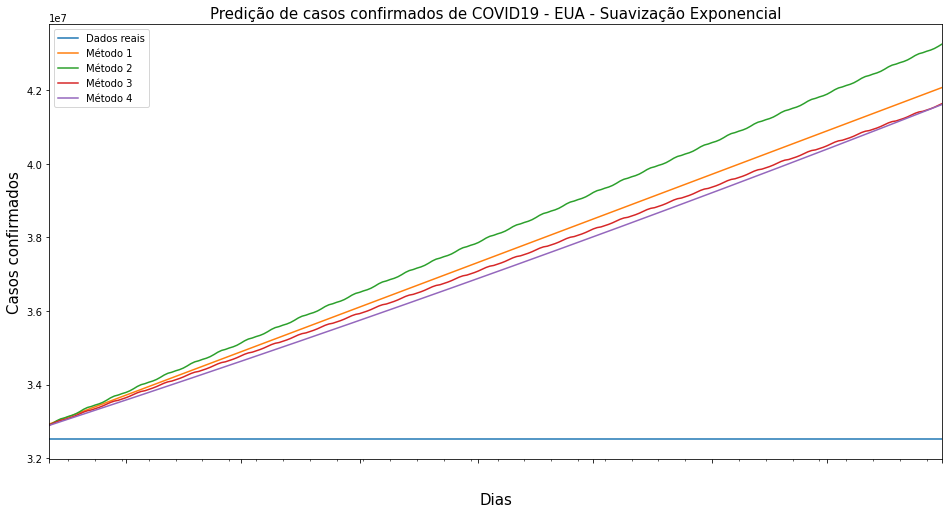

In [11]:
country = ['Brasil', 'Índia', 'Itália', 'EUA'] #Lista de países
for i in range(len(country)):
    if country[i] == "Brasil":
        dataframe = read_csv("datasets/countries/casos_covid19_brazil_date.csv",encoding='utf-8',index_col='date')

    if country[i] == "Índia":
        dataframe = read_csv("datasets/countries/casos_covid19_india_date.csv",encoding='utf-8',index_col='date')
        
    if country[i] == "Itália":
        dataframe = read_csv("datasets/countries/casos_covid19_italy_date.csv",encoding='utf-8',index_col='date')

    if country[i] == "EUA":
        dataframe = read_csv("datasets/countries/casos_covid19_us_date.csv",encoding='utf-8',index_col='date')
    total = len(dataframe)
    t = int(total*0.33)
    treino=dataframe.iloc[:-t]
    teste=dataframe.iloc[-t:]
    #Implementando modelos
    model1=SimpleExpSmoothing(treino).fit(smoothing_level=0.111,optimized=True)
    modelo1=model1.forecast(len(teste))
    model2=Holt(treino).fit(smoothing_level=0.2)
    modelo2=model2.forecast(len(teste))
    model3=ExponentialSmoothing(treino,trend='add',seasonal='add').fit()
    modelo3=model3.forecast(len(teste))
    model4=ExponentialSmoothing(treino,trend='add',seasonal='mul').fit()
    modelo4=model4.forecast(len(teste))
    model5=ExponentialSmoothing(treino,trend='mul',seasonal='add').fit()
    modelo5=model5.forecast(len(teste))

    #Plotando testes
    teste.plot(figsize=(16,8), color = 'cyan')
    plt.title('Dados reais - %s' %(country[i]), size = 15)
    plt.xticks(color='w')
    plt.ylabel('Casos confirmados', size = 15)
    plt.xlabel('Dias', size = 15)
    plt.show()


    modelo1.plot(figsize=(16,8))
    modelo2.plot()
    modelo3.plot()
    modelo4.plot()
    modelo5.plot()
    plt.title('Predição de casos confirmados de COVID19 - %s - Suavização Exponencial' %(country[i]), size = 15)
    plt.xticks(color='w')
    plt.ylabel('Casos confirmados', size = 15)
    plt.xlabel('Dias', size = 15)
    lista=['Dados reais','Método 1','Método 2','Método 3','Método 4','Método 5']
    plt.legend(lista)
    plt.show()